# Dataset Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters for the Gaussian distributions
# Class 0 parameters
mean0 = 1
std0 = 0.25
samples0 = 16  # Number of samples for class 0

# Class 1 parameters
mean1 = -1
std1 = 1
samples1 = 50  # Number of samples for class 1

# Generate samples
data0 = np.random.normal(mean0, std0, samples0)
data1 = np.random.normal(mean1, std1, samples1)

# Create DataFrame
df0 = pd.DataFrame({'Feature': data0, 'Class': np.zeros(samples0, dtype=int)})
df1 = pd.DataFrame({'Feature': data1, 'Class': np.ones(samples1, dtype=int)})

# Combine and shuffle
df = pd.concat([df0, df1]).sample(frac=1).reset_index(drop=True)

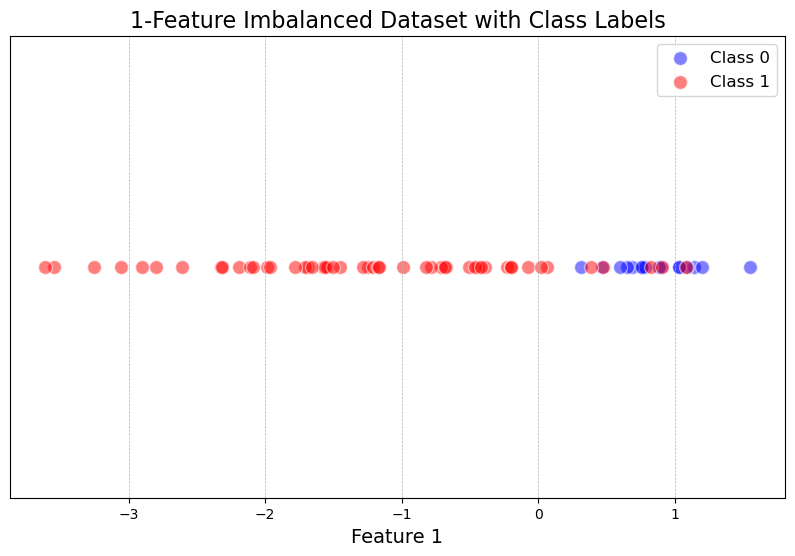

In [2]:

plt.figure(figsize=(10, 6))

plt.scatter(df['Feature'][df['Class'] == 0], np.zeros(sum(df['Class'] == 0)),
            color='blue', alpha=0.5, s=100, edgecolor='w', label='Class 0')
plt.scatter(df['Feature'][df['Class'] == 1], np.zeros(sum(df['Class'] == 1)),
            color='red', alpha=0.5, s=100, edgecolor='w', label='Class 1')

plt.xlabel('Feature 1', fontsize=14)
plt.yticks([])
plt.title('1-Feature Imbalanced Dataset with Class Labels', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Weighted Concatenation

In [3]:
N = df[df['Class'] == df['Class'].value_counts().idxmax()].reset_index(drop=True)
P = df[df['Class'] == df['Class'].value_counts().idxmin()].reset_index(drop=True)
df_features = df.drop('Class', axis=1).values
df_lables = df['Class'].values
N_feature = N.drop('Class', axis=1).values

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(df_features)
distances, indices = nn.kneighbors(N_feature)
delta_function = lambda idx: (df_lables[idx] == N['Class'][0]).astype(int)
weights = []
for i in range(indices.shape[0]):
    weight = np.sum([delta_function(idx) for idx in indices[i, 1:]], axis=0) / 5.0
    weights.append(weight)
N['weight'] = weights
Set_N = N.sample(n=6, replace=False, weights='weight')
N = N.drop('weight', axis=1)

set1_repeated = pd.concat([N.drop(['Class'], axis=1)] * len(Set_N), ignore_index=True)
set2_repeated = Set_N.loc[Set_N.index.repeat(len(N))].reset_index(drop=True).drop(['weight'], axis=1)
concatenated_set = pd.concat([set1_repeated, set2_repeated], axis=1)
concatenated_set.columns = ['Feature1', 'Feature2', 'Class']

P_repeated = pd.concat([P.drop('Class', axis=1)] * len(P), ignore_index=True)
P_repeated_2 = P.loc[P.index.repeat(len(P))].reset_index(drop=True)
concatenated_set2 = pd.concat([P_repeated, P_repeated_2], axis=1)
concatenated_set2.columns = ['Feature1', 'Feature2', 'Class']

df_C = pd.concat([concatenated_set, concatenated_set2]).reset_index(drop=True)

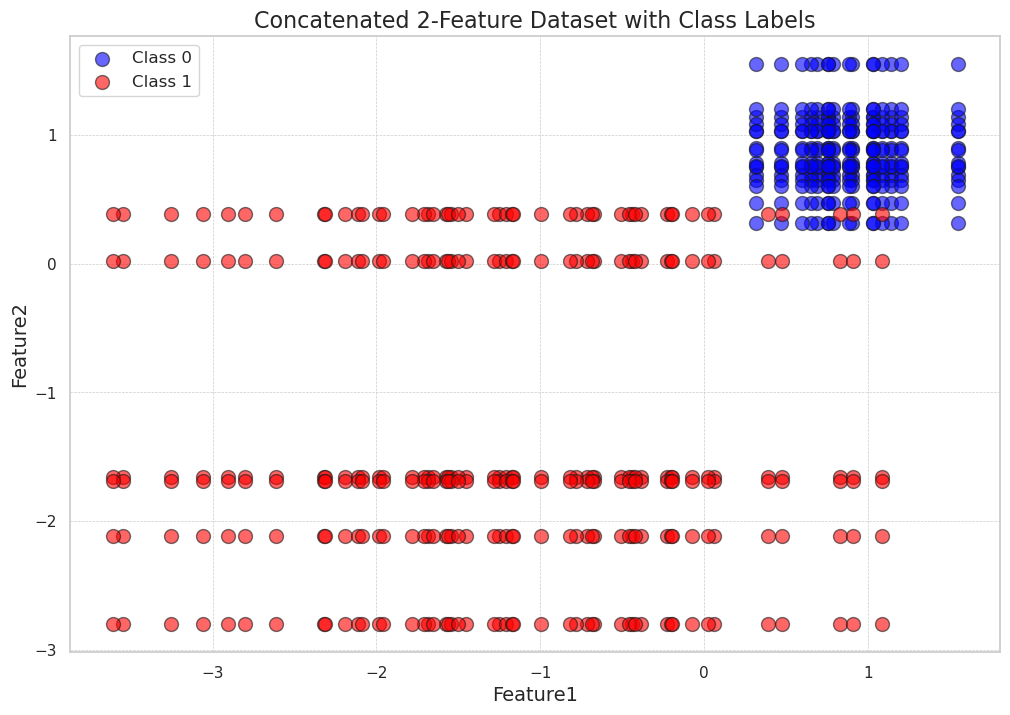

In [4]:
plt.figure(figsize=(12, 8))

# Using seaborn for advanced visual styles
sns.set(style="whitegrid")

plt.scatter(df_C[df_C['Class'] == 0]['Feature1'], df_C[df_C['Class'] == 0]['Feature2'],
            color='blue', alpha=0.6, s=100, edgecolor='k', label='Class 0')
plt.scatter(df_C[df_C['Class'] == 1]['Feature1'], df_C[df_C['Class'] == 1]['Feature2'],
            color='red', alpha=0.6, s=100, edgecolor='k', label='Class 1')

plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)
plt.title('Concatenated 2-Feature Dataset with Class Labels', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Random Concatenation

In [5]:
Set_N2 = N.sample(n=6, replace=False)

set1_repeated = pd.concat([N.drop(['Class'], axis=1)] * len(Set_N), ignore_index=True)
set2_repeated = Set_N2.loc[Set_N2.index.repeat(len(N))].reset_index(drop=True)
concatenated_set = pd.concat([set1_repeated, set2_repeated], axis=1)
concatenated_set.columns = ['Feature1', 'Feature2', 'Class']

df_C_random = pd.concat([concatenated_set, concatenated_set2]).reset_index(drop=True)

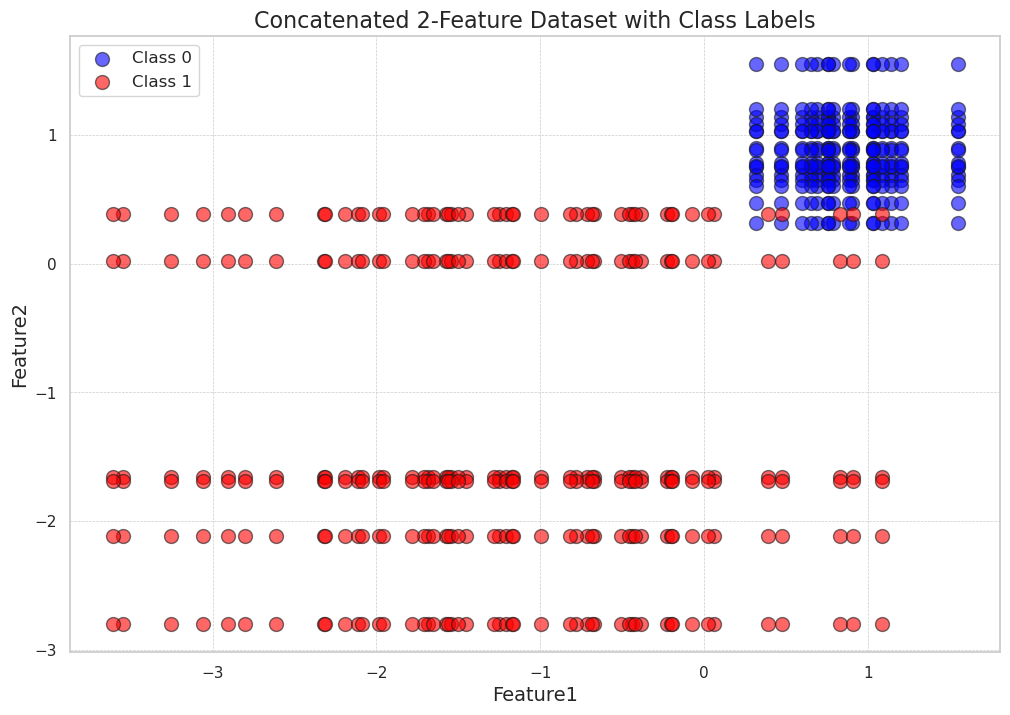

In [6]:
plt.figure(figsize=(12, 8))

# Using seaborn for advanced visual styles
sns.set(style="whitegrid")

plt.scatter(df_C[df_C['Class'] == 0]['Feature1'], df_C[df_C['Class'] == 0]['Feature2'],
            color='blue', alpha=0.6, s=100, edgecolor='k', label='Class 0')
plt.scatter(df_C[df_C['Class'] == 1]['Feature1'], df_C[df_C['Class'] == 1]['Feature2'],
            color='red', alpha=0.6, s=100, edgecolor='k', label='Class 1')

plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)
plt.title('Concatenated 2-Feature Dataset with Class Labels', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Example usage:
datasets = [
    {"X": X1, "y": y1, "name": "Random Concatenation"},
    {"X": X2, "y": y2, "name": "Weighted Concatenation"},
    {"X": X3, "y": y3, "name": "Original Dataset"},
]

measures = ["Adapted_N1", "Adapted_N2", "Adapted_N3", "Adapted_CM"]

minority_measures = {measure: [] for measure in measures}
majority_measures = {measure: [] for measure in measures}

for dataset in datasets:
    complexity = test.Complexity(dataset["X"], dataset["y"],distance_func="euclidean")

    n1_adapted = complexity.N1_adapted()
    minority_measures["Adapted_N1"].append(n1_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N1"].append(n1_adapted[np.argmax(complexity.class_count)])

    n2_adapted = complexity.N2_adapted()
    minority_measures["Adapted_N2"].append(n2_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N2"].append(n2_adapted[np.argmax(complexity.class_count)])
    
    n3_adapted = complexity.N3_adapted()
    minority_measures["Adapted_N3"].append(n3_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N3"].append(n3_adapted[np.argmax(complexity.class_count)])
    
    cm_adapted = complexity.CM_adapted()
    minority_measures["Adapted_CM"].append(cm_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_CM"].append(cm_adapted[np.argmax(complexity.class_count)])




In [30]:
epsilon = 0.016
for c in minority_measures :
    for i in range(len(minority_measures[c])):
        if minority_measures[c][i] == 0 :
            minority_measures[c][i] = epsilon

In [31]:
ep = 0.005
for c in majority_measures :
    for i in range(len(majority_measures[c])):
        if majority_measures[c][i] == 0 :
            majority_measures[c][i] = ep

In [32]:
majority_measures

{'Adapted_N1': [0.006666666666666667, 0.043333333333333335, 0.18],
 'Adapted_N2': [0.020228264559425734,
  0.017112756251328444,
  0.03336388756594124],
 'Adapted_N3': [0.005, 0.01, 0.1],
 'Adapted_CM': [0.016666666666666666, 0.03666666666666667, 0.12]}

In [33]:
minority_measures

{'Adapted_N1': [0.016, 0.016, 0.125],
 'Adapted_N2': [0.030373629380564666, 0.04865152121926059, 0.6801527575723411],
 'Adapted_N3': [0.016, 0.015625, 0.25],
 'Adapted_CM': [0.00390625, 0.08984375, 0.875]}

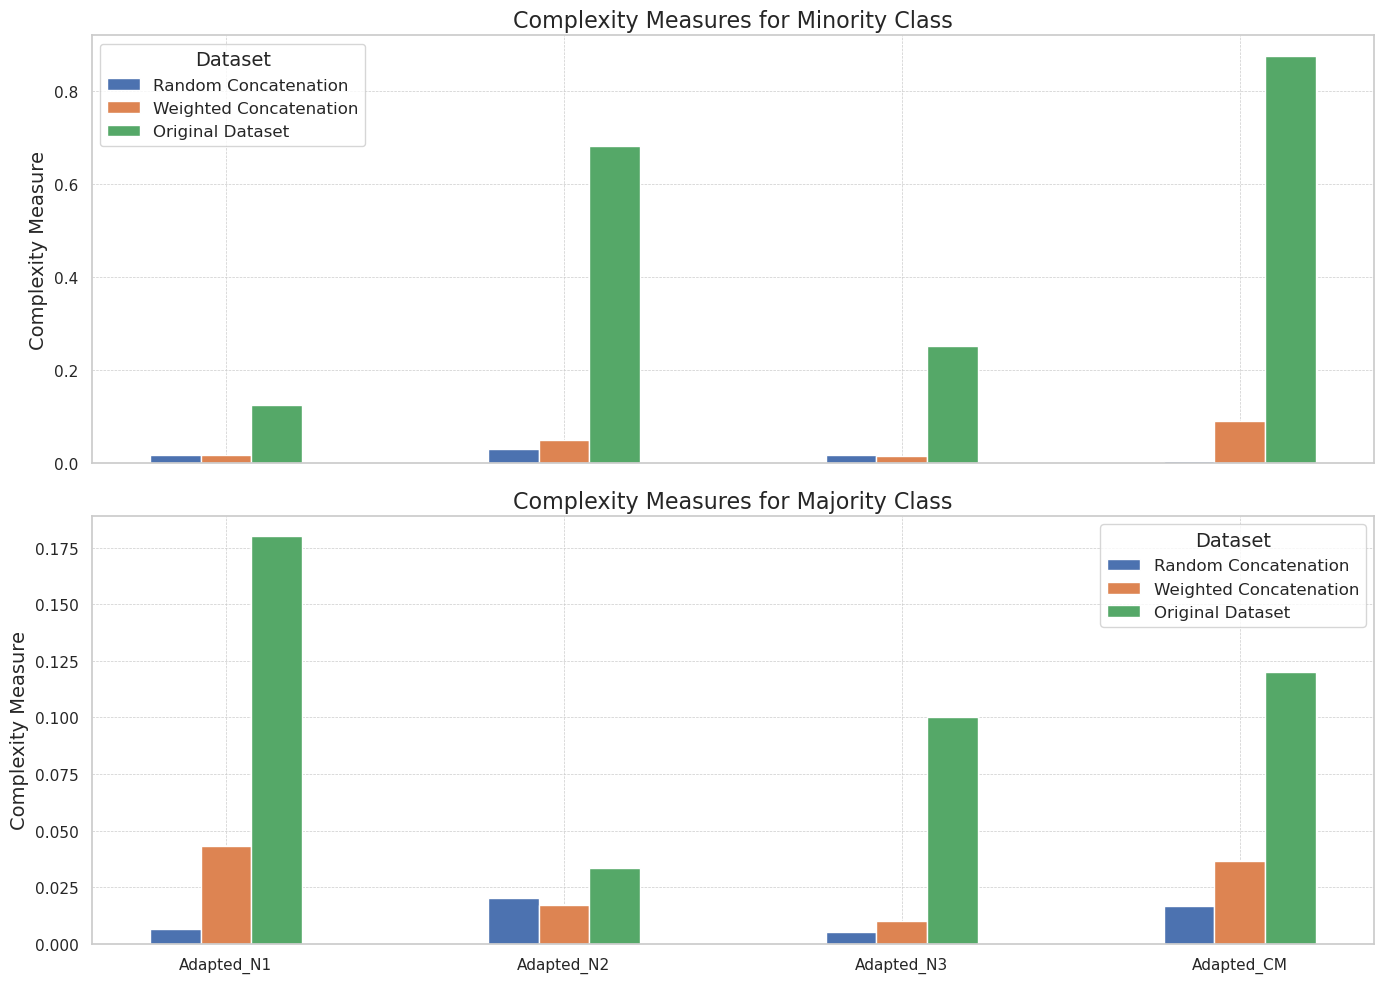

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_complexity_measures2(measures, minority_measures, majority_measures, datasets, bar_width=0.15):
    # Prepare the data for plotting
    minority_data = []
    majority_data = []
    for i, dataset in enumerate(datasets):
        for measure in measures:
            minority_data.append({'Dataset': dataset["name"], 'Measure': measure, 'Complexity': minority_measures[measure][i], 'Class': 'Minority'})
            majority_data.append({'Dataset': dataset["name"], 'Measure': measure, 'Complexity': majority_measures[measure][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df_minority = pd.DataFrame(minority_data)
    df_majority = pd.DataFrame(majority_data)

    # Plot settings
    x = np.arange(len(measures))
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Plot for Minority Class
    for i, dataset in enumerate(datasets):
        axes[0].bar(x + i * bar_width, [minority_measures[measure][i] for measure in measures], bar_width, label=dataset["name"])
    axes[0].set_title('Complexity Measures for Minority Class', fontsize=16)
    axes[0].set_ylabel('Complexity Measure', fontsize=14)
    axes[0].set_xticks(x + bar_width * (len(datasets) - 1) / 2)
    axes[0].set_xticklabels(measures)
    axes[0].legend(title='Dataset', fontsize=12, title_fontsize=14)
    axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot for Majority Class
    for i, dataset in enumerate(datasets):
        axes[1].bar(x + i * bar_width, [majority_measures[measure][i] for measure in measures], bar_width, label=dataset["name"])
    axes[1].set_title('Complexity Measures for Majority Class', fontsize=16)
    axes[1].set_ylabel('Complexity Measure', fontsize=14)
    axes[1].set_xticks(x + bar_width * (len(datasets) - 1) / 2)
    axes[1].set_xticklabels(measures)
    axes[1].legend(title='Dataset', fontsize=12, title_fontsize=14)
    axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()


plot_complexity_measures2(measures, minority_measures, majority_measures, datasets, bar_width=0.15)
